### chapter 4 - training models

In [13]:

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / 'images'/'training_linear_models'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig (fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format= fig_extension, dpi = resolution)

## Linear regression

### The normal equation 

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 *np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)

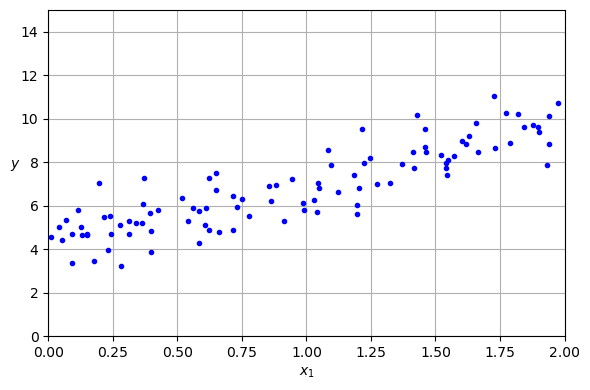

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
save_fig('generated_data_plot')
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

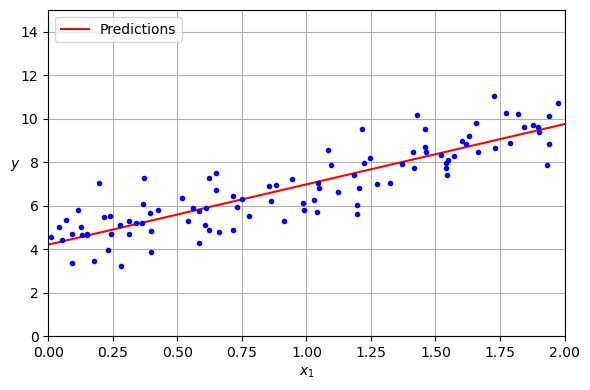

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict,'r-', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc='upper left')
save_fig('linear_model_predictions_plot')

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

this function computes X+y where X+ is the pseudoinverse of X (Moore-Penrose inverse).Use np.linalg.pinv() to compute the pseudoinverse directly

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient descent

#### Batch gradient descent

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta -y)
    theta = theta - eta * gradients

In [ ]:
X_b.shape , theta.shape, y.shape

((100, 2), (2, 1), (100, 1))

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

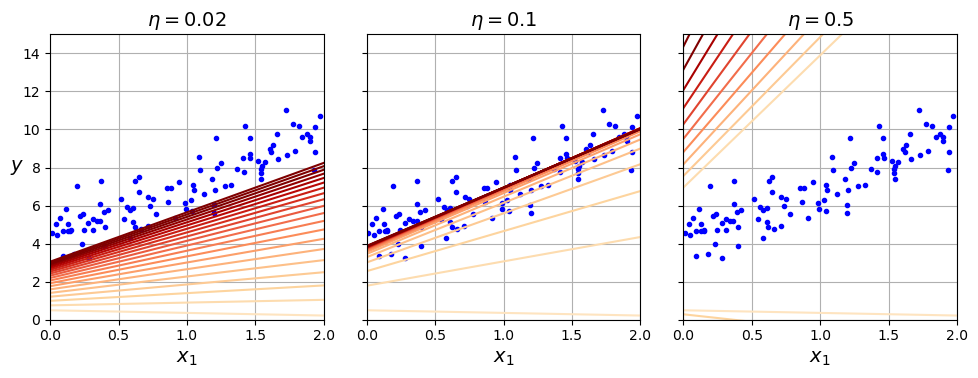

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/ n_shown +0.15))
            plt.plot(X_new, y_predict,linestyle='solid',color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta -y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()
            

#### Stochastic gradient descent

In [30]:
theta_path_sgd = []

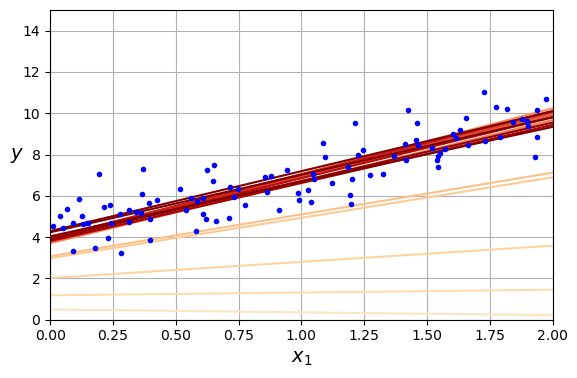

In [31]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown :
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown +0.15))
            plt.plot(X_new, y_predict,color=color)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for sgd do not divide by m
        eta = learning_schedule( epoch * m +iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [32]:
theta

array([[4.21076011],
       [2.74856079]])

In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [44]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#### Mini batch gradient descent

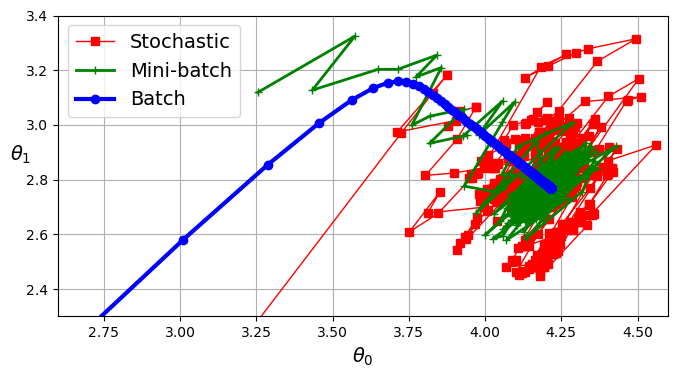

In [64]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m/ minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t+t1)

theta_path_mgd = []
for epoch in range (n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0,n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx: idx+minibatch_size]
        yi = y_shuffled[idx: idx+minibatch_size]
        gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], 'r-s',linewidth=1,
         label='Stochastic')

plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1], 'g-+',linewidth=2,
         label='Mini-batch')

plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1], 'b-o',linewidth=3,
         label='Batch')

plt.grid()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$',rotation=0)
plt.legend(loc='upper left')
plt.axis([2.6, 4.6, 2.3, 3.4])
save_fig('gradient_descent_paths_plot')
plt.show()

### Polynomial regression

numpy.ndarray